# Republic of Ireland electoral divisions

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile
import matplotlib.pyplot as plt
import geopandas as gpd
import pooch

In [2]:
URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "429c839036934413bb740bea190f2596_0/downloads/data?"
    "format=shp&spatialRefId=2157&where=1%3D1"
)

KNOWN_HASH = None
FILE_NAME = "electoral-divisions-2019.zip"
SUB_DIR = os.path.join("data", "boundaries", "OSi")
DATA_FILE = os.path.join(SUB_DIR, FILE_NAME)
os.makedirs(SUB_DIR, exist_ok=True)

In [3]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL, known_hash=KNOWN_HASH, fname=FILE_NAME, path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-4]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 6dabe10b8e36b256cc981e6967abf7e80d3caf77a957cf2d3a7a9d0dc24e0a3b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [3]:
ZipFile(DATA_FILE).namelist()

['Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.shp',
 'Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.shx',
 'Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.dbf',
 'Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.cpg',
 'Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.prj',
 'Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.xml']

In [3]:
data = gpd.read_file(
    f"zip://{DATA_FILE}!"
    "Electoral_Divisions_-_OSi_National_Statutory_Boundaries_-_2019.shp"
)

In [5]:
data.head()

,ED_ID,ENGLISH,GAEILGE,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,ESRI_OID,Shape__Are,Shape__Len,geometry
0,267160,TURNAPIN,Turnapain,Baile Átha Cliath,DUBLIN,Leinster,2ae19629-1cea-13a3-e055-000000000001,717365.57,740807.88,943505.13,1,9.435051e+05,4732.251966,"POLYGON ((717716.712 741601.510, 717759.461 74..."
1,27045,DRUMLUMMAN,Droim Lomáin,An Cabhán,CAVAN,Ulster,2ae19629-1caa-13a3-e055-000000000001,638130.82,789588.69,17617760.82,2,1.761776e+07,21762.101454,"POLYGON ((637756.185 787640.988, 637753.646 78..."
2,117019,CASTLEFORE,Baile Choille Fóir,Liatroim,LEITRIM,Connacht,2ae19629-171c-13a3-e055-000000000001,606853.02,809670.32,14080012.63,3,1.408001e+07,21907.071044,"POLYGON ((608196.069 807618.950, 608244.536 80..."
3,37135,RAHONA,Ráth Úna,An Clár,CLARE,Munster,2ae19629-1fec-13a3-e055-000000000001,481634.87,649839.86,24664562.56,4,2.466456e+07,35830.867808,"POLYGON ((484212.068 651795.629, 484231.866 65..."
4,167021,CROSSAKEEL,Crosa Caoil,An Mhí,MEATH,Leinster,2ae19629-1861-13a3-e055-000000000001,662161.01,774125.96,20159197.51,5,2.015920e+07,34415.329703,"POLYGON ((663308.409 776111.796, 663305.294 77..."


In [6]:
data.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

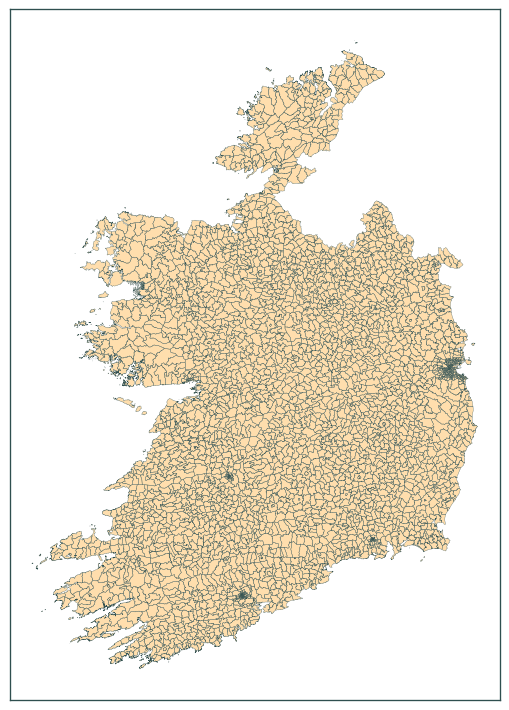

In [5]:
base = data.plot(color="navajowhite", figsize=(7.5, 7.5))
data.boundary.plot(ax=base, color="darkslategrey", linewidth=0.2)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [7]:
data.to_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="OSi_IE_electoral_divisions_2019",
)